###   ## Concrete compressive strength
  
  #Project 6 | Author - Mohit Pundir
  #Purpose - Modeling of strength of high performance concrete using Machine Learning


In [97]:
# Importing the library
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1)
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import svm

import xgboost
from sklearn.metrics import explained_variance_score

from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier # RF classifier
# Packages for visuals
import matplotlib.pyplot as plt
np.random.seed(0) # random seed setting =0

In [2]:
# Loading the dataset
df = pd.read_csv('concrete.csv')

In [3]:
print('Shape of the data set: ' + str(df.shape))

Shape of the data set: (1030, 9)


In [4]:
columns_names=df.columns.tolist()
print("Columns names:",columns_names)

Columns names: ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']


In [5]:
# CHECKING FOR MISSING VALUES
Temp = pd.DataFrame(df.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [8]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


/Users/e3025941/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


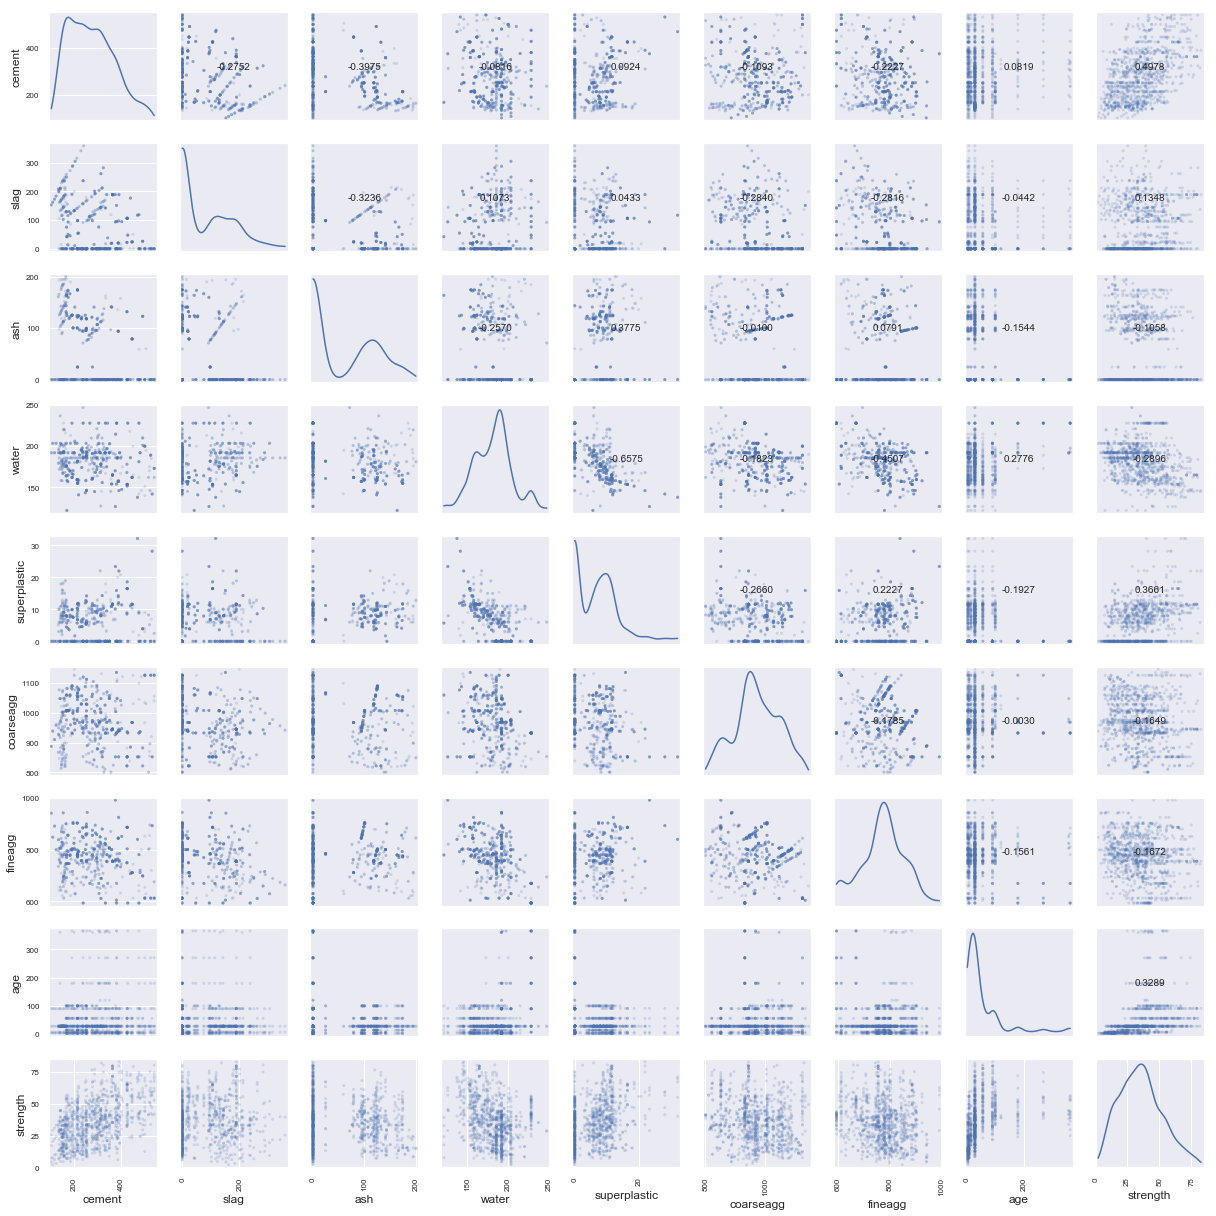

In [9]:
#print('Shape of the dataset after handling Missing values: ' + str(df.shape))
scatterplot_matrix  = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(17, 17), diagonal='kde')
corr = df.corr().as_matrix()
for i,j in zip (*plt.np.triu_indices_from(scatterplot_matrix, k=1)):
    scatterplot_matrix[i,j].annotate('%.4f' %corr[i,j], (0.5,0.5), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()

### OBSERVATION
#Scatterplot matrix shows us that-
1. there are some features such as ‘Age’ are less evenly distributed than other features.
2. 'Slag' is also scattered all over with varient values.

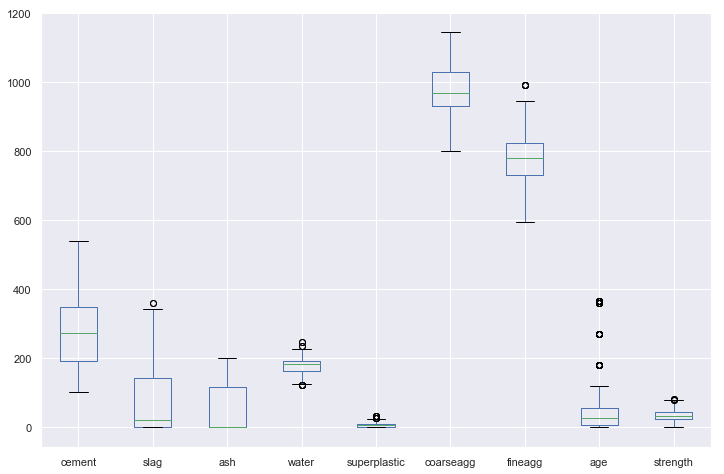

In [10]:
df.boxplot(return_type='axes', figsize=(12,8))


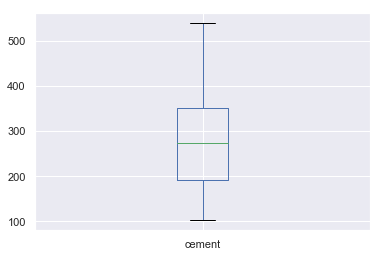

In [11]:
# Visualization 
df.boxplot(column=['cement'])

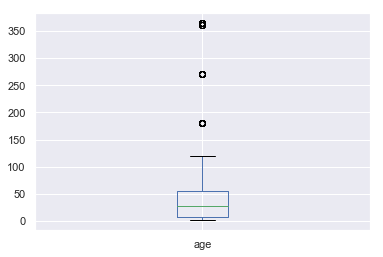

In [12]:
# Visualization 
df.boxplot(column=['age'])

### OBSERVATION:
    1. Age, Water has some outliers. Hence again, these are less evenly distributed.
    2. We need to Perform SCALING on 'coarseagg' and 'fineagg'

### Handling Missing values/Outliers

In [13]:
# We cannot actually add data to the missing values as this might be the actual sample content information.
# Example Ash or slag might be absent in many samples.
# We will see later if our final result requre usto handle outliers.

## Data Standardisation


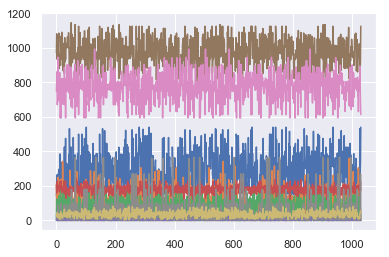

In [14]:
# prior to scaling
plt.plot(df)
plt.show()

/Users/e3025941/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/e3025941/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


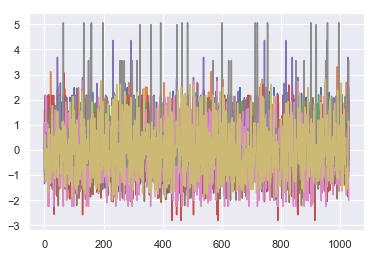

In [15]:
# Scale data
from sklearn.preprocessing import StandardScaler

DBS=StandardScaler().fit_transform(df)

plt.plot(DBS)
plt.show()

In [16]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Observing Correlation

In [17]:
df.corr()
#df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### Visualise Correlation using sns

Text(0.5, 1.0, 'Correlation between different fearures')

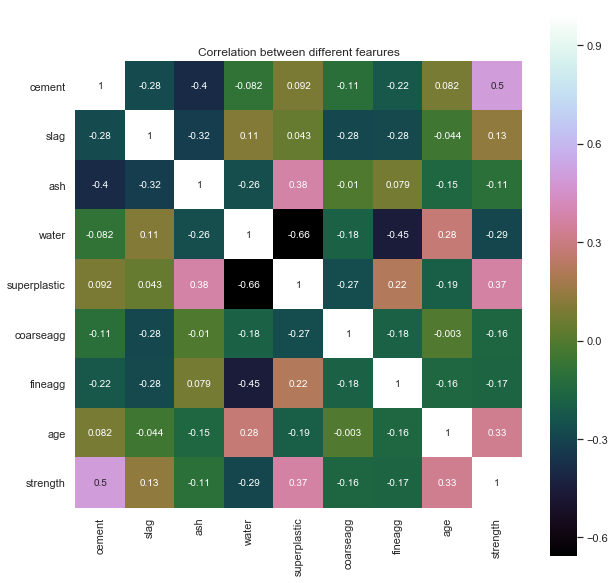

In [18]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [19]:
# Observation
# Ash,coarseagg, fineagg, slag are strongly realte to strength.
# Cement, age and superplastic is weakly realted to Strength.

#### Detecting / Handeling the outliers

In [20]:
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(df))
#print(z)

In [21]:
#threshold = 3
#print(np.where(z > 5))
# Removing outliers where Z score is greater than 4.

In [22]:
#df.head()

In [23]:
#df = df[(z < 5).all(axis=1)]

In [24]:
#df.head()

In [25]:
df.shape

(1030, 9)

In [26]:
# covariance matrix

cv=np.cov(DBS.T)

print("covariance matrix:\n\n",cv)

covariance matrix:

 [[ 1.00097182 -0.27548337 -0.39785361 -0.08166604  0.09247596 -0.10945526
  -0.22293429  0.08202566  0.49831572]
 [-0.27548337  1.00097182 -0.32389436  0.10735626  0.04331247 -0.28427461
  -0.28187634 -0.04428902  0.13496029]
 [-0.39785361 -0.32389436  1.00097182 -0.25723376  0.37787001 -0.00997051
   0.07918537 -0.15452054 -0.10585769]
 [-0.08166604  0.10735626 -0.25723376  1.00097182 -0.65817191 -0.18247076
  -0.45109913  0.27788802 -0.28991486]
 [ 0.09247596  0.04331247  0.37787001 -0.65817191  1.00097182 -0.26625765
   0.22290765 -0.1928873   0.36643459]
 [-0.10945526 -0.28427461 -0.00997051 -0.18247076 -0.26625765  1.00097182
  -0.17865441 -0.00301881 -0.1650949 ]
 [-0.22293429 -0.28187634  0.07918537 -0.45109913  0.22290765 -0.17865441
   1.00097182 -0.1562464  -0.16740378]
 [ 0.08202566 -0.04428902 -0.15452054  0.27788802 -0.1928873  -0.00301881
  -0.1562464   1.00097182  0.32919261]
 [ 0.49831572  0.13496029 -0.10585769 -0.28991486  0.36643459 -0.1650949
  

In [27]:
#eigen values and vectors

eig_vals,eig_vecs=np.linalg.eig(cv)    # Eigen values and Eigen vectors
print("\nEigen Values: \n",eig_vals,"\n")    # print eigen values
print("Eigen Vectors: \n",eig_vecs)    # print eigen vectors


Eigen Values: 
 [2.29012322 1.93822536 0.02878183 0.14704291 0.28713483 1.41026096
 0.8481947  1.04383811 1.01514443] 

Eigen Vectors: 
 [[ 4.13267471e-02 -5.36485954e-01 -4.72559364e-01  2.98253891e-01
  -1.33851817e-01 -3.59693365e-01  3.89824821e-01 -3.09813343e-01
  -5.44413593e-02]
 [ 1.63042739e-01 -1.36147699e-01 -4.51184668e-01  2.28769298e-01
   4.94798767e-03  6.99055619e-01 -2.70156315e-01  7.59934879e-02
  -3.62650227e-01]
 [-3.69899564e-01  2.68270482e-01 -3.86431831e-01  2.55347236e-01
   2.47325097e-01 -1.98043268e-02  3.20385015e-01  6.00689663e-01
   2.27237640e-01]
 [ 5.64021863e-01  1.18457734e-01 -3.56041055e-01 -5.85652817e-01
  -1.00896687e-02  1.20189288e-01  3.06016015e-01  4.72149236e-02
   2.96091761e-01]
 [-5.36018387e-01 -2.48248754e-01 -5.28466889e-02 -4.47332284e-01
  -6.14074852e-01  1.87966815e-01  8.26508492e-02  1.65929475e-01
  -3.70769171e-02]
 [ 6.02738613e-02  2.24761035e-01 -3.37167625e-01 -2.42939734e-01
  -5.96959024e-02 -5.49480030e-01 -3.4766

In [28]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.290123215566452
1.9382253587990348
1.410260955678982
1.0438381145515159
1.0151444320147072
0.8481947047472663
0.2871348333466783
0.1470429063975274
0.02878183458296912


In [29]:
tot = sum(eig_vals)
var_exp = [(i / tot)*10 for i in sorted(eig_vals, reverse=True)]

In [30]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(9,1), 
                      eig_pairs[1][1].reshape(9,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.04132675 -0.53648595]
 [ 0.16304274 -0.1361477 ]
 [-0.36989956  0.26827048]
 [ 0.56402186  0.11845773]
 [-0.53601839 -0.24824875]
 [ 0.06027386  0.22476104]
 [-0.38176315  0.18686019]
 [ 0.26194127 -0.25176813]
 [-0.10704127 -0.63023524]]


In [31]:
Y = DBS.dot(matrix_w)
Y

array([[ 1.73904744,  0.88521467],
       [-1.6137013 ,  1.55605365],
       [-0.63551117,  0.98994947],
       ...,
       [-0.60716547, -0.57214979],
       [ 3.32261929, -1.94804713],
       [ 1.22155106, -1.64378725]])

# PCA

Text(0, 0.5, 'Cumulative explained variance')

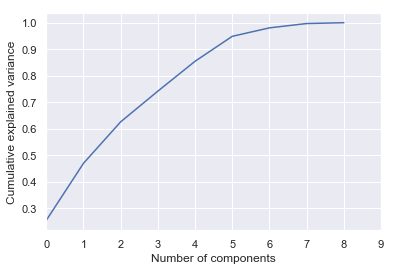

In [32]:
from sklearn.decomposition import PCA
pca = PCA().fit(DBS)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,9,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#### OBSERVATION
 We have around 6 component that exhibit any sort of cumulative varience on the data.

In [33]:
######################################################################

## Feature engineering Analysis

> Important factor in concrete engineering is the "water-cement" ratio and "water to binder" ratio.


> These two generally imples the strength of final mixture.

##### ** Water to cement seems to be the simplest:
            w/c=Water[kgm3] / Cement[kgm3]
            
##### ** Water to binder ratio
Depending on the definition we could count fly ash and slag as binder as well. Usually they are weighted with k-values which we do not have. Hence, we have to try without them:

             w/b=Water[kgm3] / (Cement[kgm3]+Fly ash[kgm3]+slag[kgm3])

##### Important

> NOW, from the earlier PCA information we knew 6 component that determine the Strength mainly - 
4 of these component are crossverified as water, cement, ash, slag from the civil engineering data.

In [34]:


### Water-Cement ratio would replace the water and cement column for each samples(rows)



In [35]:
# pure water-cement ratio feature
df_wcratio = df.copy()
df_wcratio.insert(df_wcratio.shape[-1]-1,'water-cement-ratio', df_wcratio['water']/df_wcratio['cement'])
df_wcratio.drop(['water', 'cement'], axis=1, inplace=True)

In [36]:
df_wcratio.head()

,slag,ash,superplastic,coarseagg,fineagg,age,water-cement-ratio,strength
0,212.0,0.0,0.0,971.8,748.5,28,1.440198,29.89
1,42.2,124.3,10.8,1080.8,796.2,14,0.937241,23.51
2,0.0,95.7,5.5,956.9,861.2,28,0.749600,29.22
3,114.0,0.0,0.0,932.0,670.0,28,0.857143,45.85
4,183.4,0.0,9.1,1047.4,696.7,28,1.248708,18.29


In [37]:
# scale it!
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_wcratio_scaled = df_wcratio.copy()
df_wcratio_sc = scaler.fit_transform(df_wcratio)
df_wcratio_scaled.loc[:,:] = df_wcratio_sc

In [38]:
df_wcratio_scaled.head()

,slag,ash,superplastic,coarseagg,fineagg,age,water-cement-ratio,strength
0,0.589872,0.000000,0.000000,0.848734,0.754080,0.076712,0.765105,0.361864
1,0.117418,0.621189,0.335404,0.943930,0.802136,0.038356,0.497909,0.284625
2,0.000000,0.478261,0.170807,0.835721,0.867620,0.076712,0.398225,0.353753
3,0.317195,0.000000,0.000000,0.813974,0.674995,0.076712,0.455357,0.555085
4,0.510295,0.000000,0.282609,0.914760,0.701894,0.076712,0.663376,0.221429


In [39]:
# making the scaling function more accessible
extract_scaling_function = np.ones((1,df_wcratio.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)

In [40]:
# split data into X and y
y_df = df_wcratio_scaled['strength'].copy()
X_df = df_wcratio_scaled.copy()
X_df.drop('strength', axis=1, inplace=True)


In [41]:
# add it to the dict of datasets for fast and iterative testing

X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values,test_size=0.2, random_state=42, shuffle=True)
comment = 'pure water-cement-ratio; 7 inputs, 1 output'
datasets = {}
dataset_id=0
datasets[dataset_id] = {'X_train': X_train, 'X_test' : X_test, 'y_train': y_train, 'y_test' : y_test, 'scaler' : scaler, 'scaler_array' : extract_scaling_function, 'comment' : comment, 'dataset' : dataset_id}
dataset_id += 1

In [42]:
df_wcratio['water-cement-ratio'].head()

0    1.440198
1    0.937241
2    0.749600
3    0.857143
4    1.248708
Name: water-cement-ratio, dtype: float64

In [43]:
df_wcratio['water-cement-ratio'].describe()

count    1030.000000
mean        0.748266
std         0.314005
min         0.266893
25%         0.533333
50%         0.675349
75%         0.935165
max         1.882353
Name: water-cement-ratio, dtype: float64

In [44]:
##### SHAPE after introducting water-cement-ratio
df_wcratio.shape

(1030, 8)

### Water to binder ratio

In [45]:

#Water to binder ratio will replace ash, slag as well.

#Depending on the definition we could count fly ash and slag as binder as well. 

In [46]:
df_wcratio_full = df.copy()
df_wcratio_full.insert(df_wcratio_full.shape[-1]-1,'water-cement-ratio_with_slag_ash',df_wcratio_full['water']/(df_wcratio_full['cement'] + df_wcratio_full['ash'] + df_wcratio_full['slag']))
df_wcratio_full.drop(['water', 'cement', 'ash', 'slag'], axis=1, inplace=True)

scaler = MaxAbsScaler()
df_wcratio_full_scaled = df_wcratio_full.copy()
df_wcratio_full_sc = scaler.fit_transform(df_wcratio_full)
df_wcratio_full_scaled.loc[:,:] = df_wcratio_full_sc
extract_scaling_function = np.ones((1,df_wcratio_full.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)

# split data into X and y
y_df = df_wcratio_full_scaled['strength'].copy()
X_df = df_wcratio_full_scaled.copy()
X_df.drop('strength', axis=1, inplace=True)

datasets = {}
X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values,test_size=0.2, random_state=42, shuffle=True)
comment = 'water-cement-ratio (binder?); 5 inputs, 1 output'
datasets[dataset_id] = {'X_train': X_train, 'X_test' : X_test, 'y_train': y_train, 'y_test' : y_test, 'scaler' : scaler, 'scaler_array' : extract_scaling_function, 'comment' : comment, 'dataset' : dataset_id}

df_wcratio_full['water-cement-ratio_with_slag_ash'].head()


0    0.575998
1    0.471974
2    0.542089
3    0.600000
4    0.571555
Name: water-cement-ratio_with_slag_ash, dtype: float64

In [47]:
df_wcratio_full['water-cement-ratio_with_slag_ash'].describe()

count    1030.000000
mean        0.469233
std         0.127123
min         0.235073
25%         0.383916
50%         0.471974
75%         0.561081
max         0.900000
Name: water-cement-ratio_with_slag_ash, dtype: float64

#

##### Dataset 1 (no features added or dropped)

In [48]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


##### Dataset 2 (water-cement ratio added, ‘Water’ and ‘Cement’ dropped)

In [49]:
df_wcratio.head()

,slag,ash,superplastic,coarseagg,fineagg,age,water-cement-ratio,strength
0,212.0,0.0,0.0,971.8,748.5,28,1.440198,29.89
1,42.2,124.3,10.8,1080.8,796.2,14,0.937241,23.51
2,0.0,95.7,5.5,956.9,861.2,28,0.749600,29.22
3,114.0,0.0,0.0,932.0,670.0,28,0.857143,45.85
4,183.4,0.0,9.1,1047.4,696.7,28,1.248708,18.29


##### Dataset 3 (water-binder ratio added, ‘Water’,’Cement’,’Slag’ and ‘Fly ash’ dropped)

In [50]:
df_wcratio_full.head()

,superplastic,coarseagg,fineagg,age,water-cement-ratio_with_slag_ash,strength
0,0.0,971.8,748.5,28,0.575998,29.89
1,10.8,1080.8,796.2,14,0.471974,23.51
2,5.5,956.9,861.2,28,0.542089,29.22
3,0.0,932.0,670.0,28,0.600000,45.85
4,9.1,1047.4,696.7,28,0.571555,18.29


### Applying machine learning algorithms

In [51]:
# Trying to implement various models with the 
#    Linear Regression
#    Random Forest Regression
#    XGBoost Regression

#Here we have taken REFERENCE : https://www.datacamp.com/community/tutorials/xgboost-in-python

#-In this case using the mean-squared error as a scorer is appropriate.
#-However, for later interpretation we have to re-calculate our metrics on the unscaled data as well since it resembles a physical value.Therefore, our regression looks like this:

In [52]:
# Logistic regression is for classification so we cannot use it here. 
# We will start by using the Linear Regression model

## Linear Regression

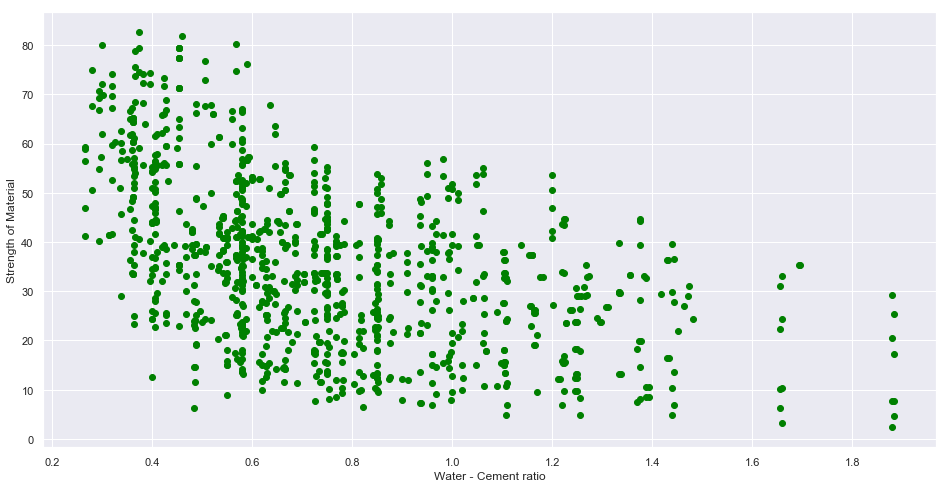

In [53]:
# We use matplotlib to make a scatter plot on Dataset 2 
# Correlation between water cement ratio and Strength.

plt.figure(figsize=(16, 8))
plt.scatter(
    df_wcratio['water-cement-ratio'],
    df_wcratio['strength'],
    c='green'
)
plt.xlabel("Water - Cement ratio")
plt.ylabel("Strength of Material")
plt.show()

#### GRAPH SHOWS 

>We can see that these are correlated and infact with increasing water-cement ration, the Strength decreases.

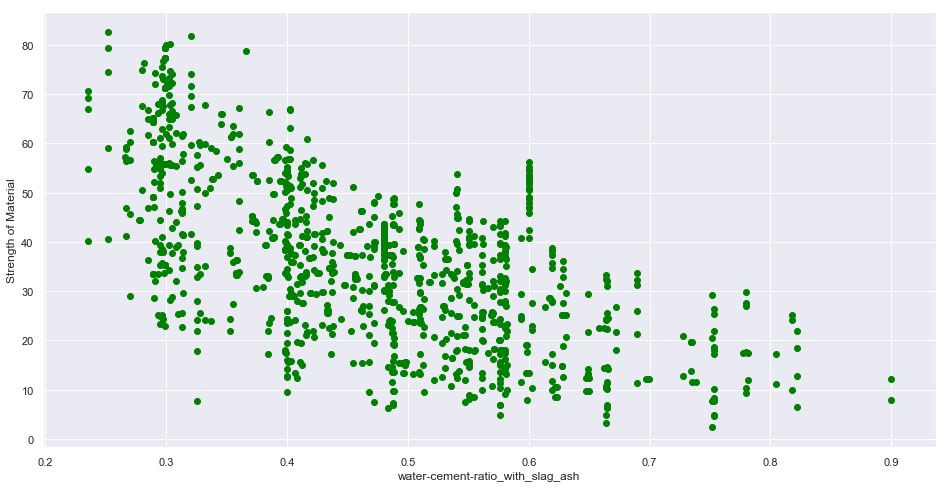

In [54]:
# We use matplotlib to make a scatter plot on Dataset 3 
# Correlation between water-cement-ratio_with_slag_ash and Strength.

plt.figure(figsize=(16, 8))
plt.scatter(
    df_wcratio_full['water-cement-ratio_with_slag_ash'],
    df_wcratio_full['strength'],
    c='green'
)
plt.xlabel("water-cement-ratio_with_slag_ash")
plt.ylabel("Strength of Material")
plt.show()

#### GRAPH SHOWS

>Similirly here we can see that these are correlated. 

>With increasing water-cement-slag ash ratio, the Strength decreases.

In [55]:
# Applying Multiple Linear Regression on this model
from sklearn.linear_model import LinearRegression
Xs = df_wcratio.drop(['strength'], axis=1)
y = df_wcratio['strength']
reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [57]:
X = np.column_stack((df_wcratio['slag'], df_wcratio['ash'], df_wcratio['superplastic'], df_wcratio['coarseagg'], df_wcratio['fineagg'], df_wcratio['age'], df_wcratio['water-cement-ratio']))
y = df_wcratio['strength']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sat, 24 Aug 2019   Prob (F-statistic):          8.97e-181
Time:                        20:39:24   Log-Likelihood:                -3930.3
No. Observations:                1030   AIC:                             7877.
Df Residuals:                    1022   BIC:                             7916.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.0682      7.286      6.597      0.0

### Conclusion on dataset 2
##### As you can see, the R² is just 56.7% value of 0.567. This is very less.

In [58]:
X = np.column_stack((df_wcratio_full['superplastic'], df_wcratio_full['coarseagg'], df_wcratio_full['fineagg'], df_wcratio_full['age'], df_wcratio_full['water-cement-ratio_with_slag_ash']))
y = df_wcratio_full['strength']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     278.6
Date:                Sat, 24 Aug 2019   Prob (F-statistic):          4.24e-188
Time:                        20:39:24   Log-Likelihood:                -3919.0
No. Observations:                1030   AIC:                             7850.
Df Residuals:                    1024   BIC:                             7880.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9727      6.113      9.648      0.0

#### Conclusion on Dataset 3 
##### R square came out to be almost same 57.6%
##### Linear Regression is not suitable model for this dataset. Moving on.

### *******************
## Random Forrest 
### *******************

In [59]:
from sklearn.ensemble import RandomForestClassifier # RF classifier
np.random.seed(0) # random seed setting =0

In [60]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

x =  df_wcratio.drop("strength", axis=1)
y =  df_wcratio['strength']

train_set, test_set, train_labels, test_labels = train_test_split(x, y, test_size=0.25, random_state=1)

In [61]:
df_wcratio.head()

,slag,ash,superplastic,coarseagg,fineagg,age,water-cement-ratio,strength
0,212.0,0.0,0.0,971.8,748.5,28,1.440198,29.89
1,42.2,124.3,10.8,1080.8,796.2,14,0.937241,23.51
2,0.0,95.7,5.5,956.9,861.2,28,0.749600,29.22
3,114.0,0.0,0.0,932.0,670.0,28,0.857143,45.85
4,183.4,0.0,9.1,1047.4,696.7,28,1.248708,18.29


In [63]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 1000,oob_score=True)
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.9154345000975935

##### Random Forrest Conclusion
###### It gives an score of 91.5%, which is much better than before. Hence RF is better model than Liner Regression.

In [66]:
############################################################################################

## XGBoost Regression

In [408]:

X =  df_wcratio.drop("strength", axis=1)
y =  df_wcratio['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [409]:
xgb = xgboost.XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=5)

In [410]:
xgb.fit(X_train,y_train)

/Users/e3025941/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:56:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [411]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.9449968848998144


### Getting Score of 94.5% with df_wcratio dataset.

In [412]:
#Lets see what we can do with dataset3.

In [420]:
X =  df_wcratio_full.drop("strength", axis=1)
y =  df_wcratio_full['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [424]:
xgb = xgboost.XGBRegressor(n_estimators=300, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=5)

In [425]:
xgb.fit(X_train,y_train)

[22:56:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/e3025941/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.08, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [426]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.931066565922847


### Getting a bit less Score of 93.1% with df_wcratio_full dataset.

### $$$$$$$$$$$$$$$$$$$$CONCLUSION

##### Now we can conclude that the best result we are getting by using the Xboost Regression on the dataset 2
##### After we applied our feature Engineering we found that:

1. Dataset 2 was one with (water-cement ratio added, ‘Water’ and ‘Cement’ dropped).
2. Linear regression gave a score of 57.6%
3. Random Forrest gave a score of 91.5%
4. Xboost Regression gave a score of 94.5%

###### Xboost Regression was the best fit model for this dataset.